In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
df = pd.read_csv("cleaned_sales.csv")

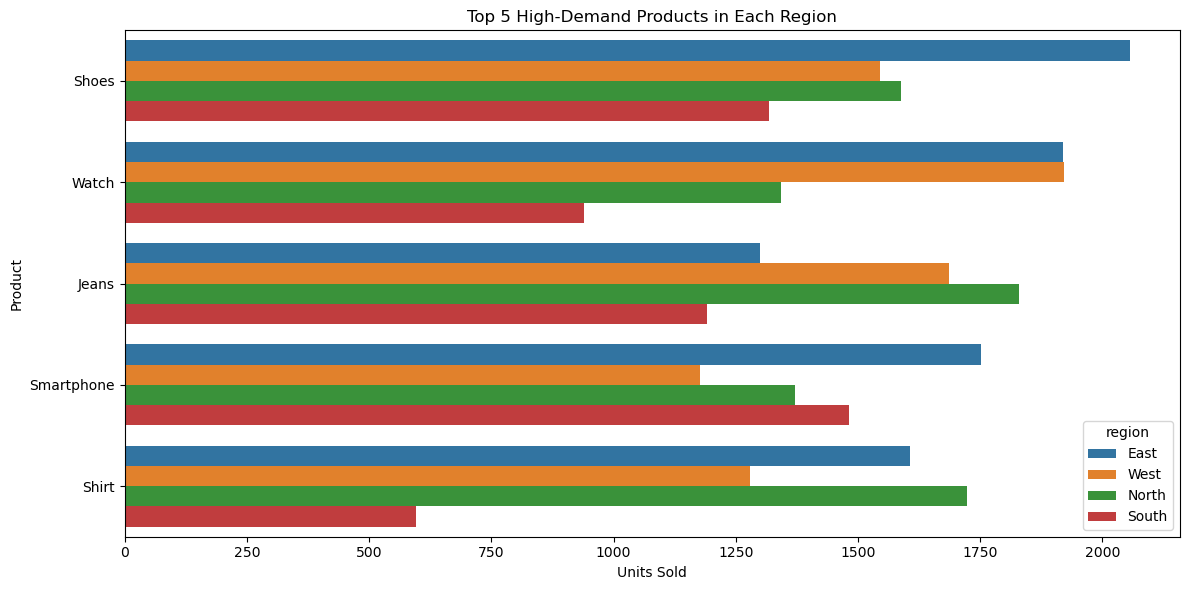

In [29]:
top_demand_by_region = (
    product_region_demand
    .sort_values(by='units_sold', ascending=False)
    .groupby('region')
    .head(5)
)

plt.figure(figsize=(12,6))
sns.barplot(data=top_demand_by_region, x='units_sold', y='product_name', hue='region')
plt.title('Top 5 High-Demand Products in Each Region')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


C:\Users\samee\AppData\Local\Temp\ipykernel_14992\718261721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='month', y='revenue', palette='viridis')


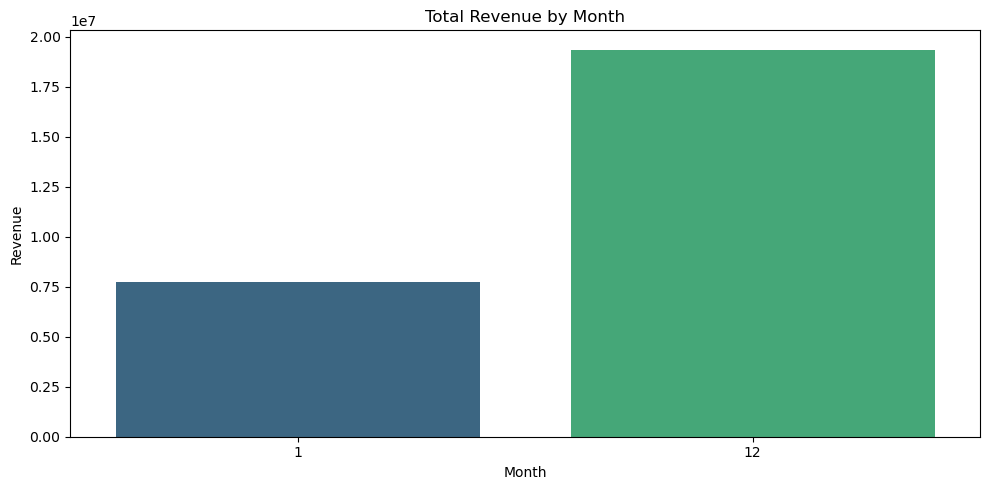

In [31]:
#  Campaign Planning - Revenue by Month
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_revenue, x='month', y='revenue', palette='viridis')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

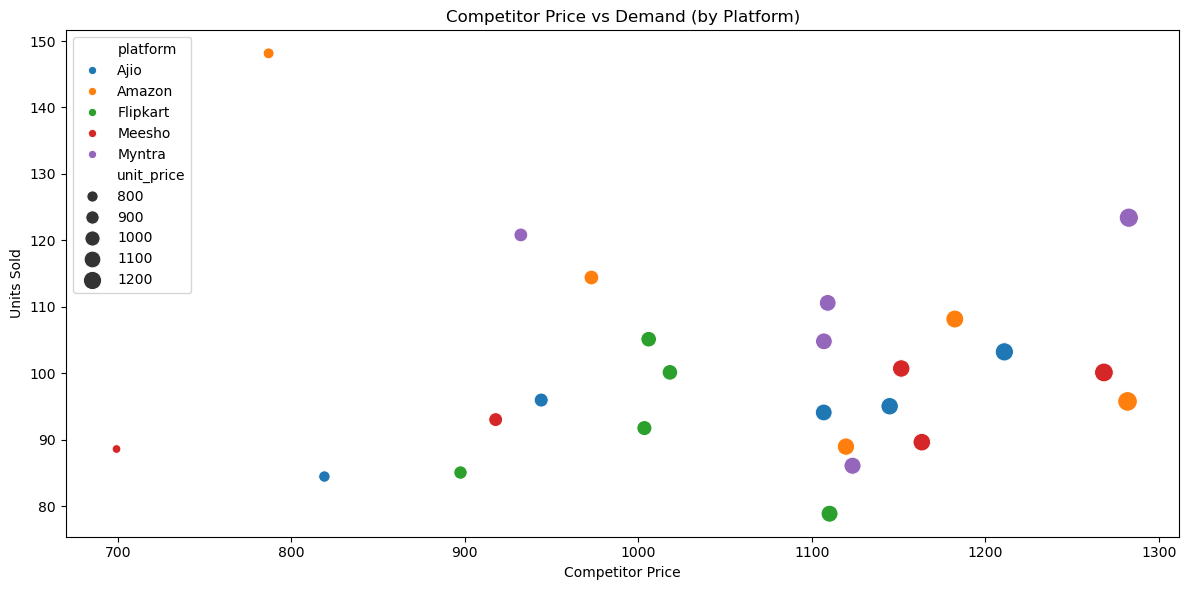

In [33]:
# Dynamic Pricing - Competitor price vs demand (using platform as competitor)
price_demand = df.groupby(['product_name', 'platform'])[['units_sold', 'competitor_price', 'unit_price']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(data=price_demand, x='competitor_price', y='units_sold', hue='platform', size='unit_price', sizes=(40, 200))
plt.title('Competitor Price vs Demand (by Platform)')
plt.xlabel('Competitor Price')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


C:\Users\samee\AppData\Local\Temp\ipykernel_14992\2929681388.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sentiment = df.groupby('age_group')[['sentiment_score', 'revenue']].mean().reset_index()


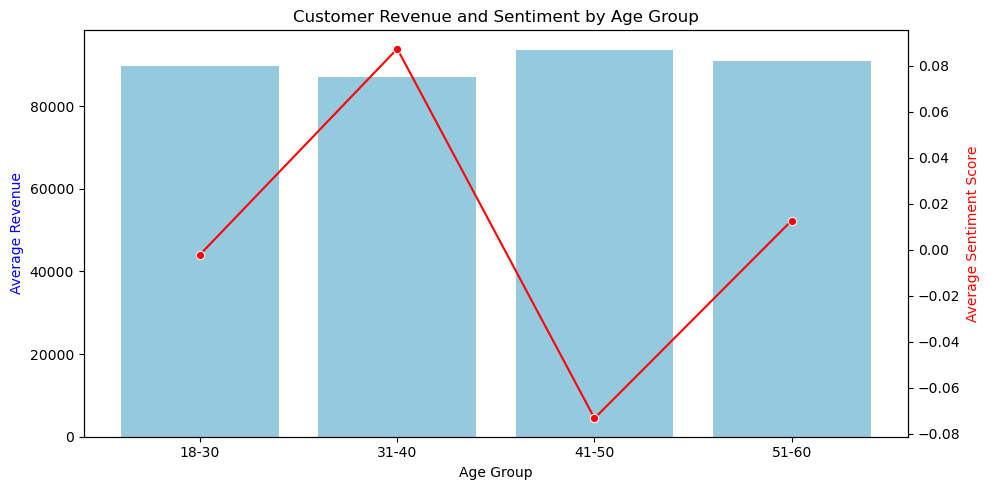

In [35]:
#  Customer Targeting - Revenue and sentiment by age group
df['age_group'] = pd.cut(df['customer_age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30','31-40','41-50','51-60','61-70'])
age_sentiment = df.groupby('age_group')[['sentiment_score', 'revenue']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(data=age_sentiment, x='age_group', y='revenue', ax=ax1, color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(data=age_sentiment, x='age_group', y='sentiment_score', ax=ax2, color='red', marker='o')

ax1.set_title('Customer Revenue and Sentiment by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Revenue', color='blue')
ax2.set_ylabel('Average Sentiment Score', color='red')
plt.tight_layout()
plt.show()
